In [7]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from functools import partial

In [8]:
def optimize(cost, random_jump, init_guess, T, decay,
             k, iterations, save_list=False):
    """
    Optimize a function through annealing, and return
    a list of intermediate guesses.

    -----

    `cost` - calculate cost of guess
    `random_jump` - take a guess and a distance, and move
    randomly
    `init_guess` - initial (random) guess
    `T` - starting temperature
    `decay` - decay rate for temperature
    `k` - boltzmann constant
    `iterations` - number of iterations to make
    `save_list` - if `True`, this returns the of intermediate
    guesses made -- otherwise, returns just the final guess
    """

    p_arr = None

    if save_list:
        p_arr = [init_guess]

    x = init_guess
    c = cost(x)

    for i in range(iterations):
        print(f"Progress: {100 * i / iterations:<8.4}%", end="\r")
        # create a new guess
        new_x = random_jump(
            x,
            (np.random.random_sample() - 0.5) * T
        )

        new_c = cost(new_x)

        if new_c < c: # if it's better, jump
            x = new_x
            c = new_c
            if save_list:
                p_arr.append(x)
        else:
            # otherwise, jump with some probability
            toss = np.random.random_sample()
            if toss < np.exp(-(new_c - c) / (k * T)):
                x = new_x
                c = new_c
                if save_list:
                    p_arr.append(x)

        T *= decay

    if save_list:
        return p_arr
    else:
        return x

In [9]:
def tsp_cost(cities, guess):
    """
    Gives the cost of travelling between cities.

    -----

    `cities` is the list of co-ordinates of the cities
    `guess` is the order in which you visit the cities
    """
    sum_dist = 0

    for i in range(-1, len(guess) - 1):
        sum_dist += np.linalg.norm(cities[guess[i]] - cities[guess[i + 1]])

    return sum_dist

def tsp_jump(guess, distance):
    """
    Swap up to `distance` + 1 values in `guess` to make a
    new guess
    """
    swaps = np.random.randint(int(np.abs(distance)) + 1) + 1
    # print(swaps)
    new_guess = guess.copy()

    for _ in range(swaps):
        swap0, swap1 = np.random.randint(len(guess), size=2)
        tmp = new_guess[swap0]
        new_guess[swap0] = new_guess[swap1]
        new_guess[swap1] = tmp

    return new_guess

In [10]:
input_filename = "tsp_10.txt"
start_temp_scale = 1/5
iterations = 500

In [11]:
lines = open(input_filename, "r").readlines()

# list of co-ordinates
cities = []

for line in lines[1:]:
    s = line.split()
    cities.append(np.array([float(s[0]), float(s[1])]))

In [12]:
init_guess = list(range(len(cities)))

In [13]:
optimum_path = optimize(
    partial(tsp_cost, cities),
    tsp_jump,
    init_guess,
    len(cities) * start_temp_scale,
    0.99,
    0.1,
    iterations,
    save_list=False
)

print()
print(optimum_path)
print(tsp_cost(cities, optimum_path))

Progress: 99.8    %
[9, 7, 1, 3, 4, 5, 6, 0, 2, 8]
34.076561394636684


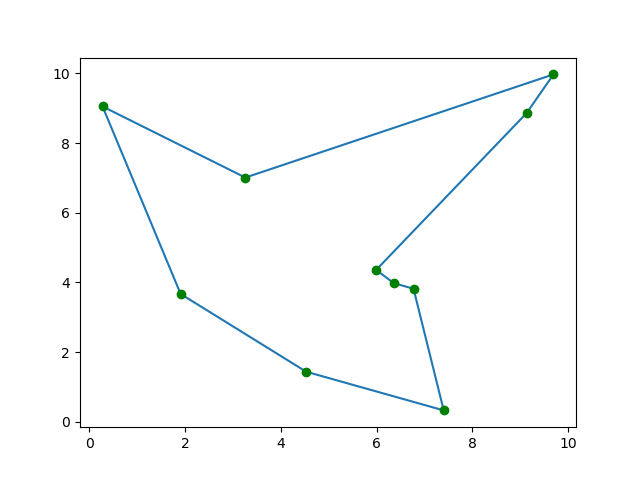

In [14]:
fig, ax = plt.subplots()

ln, = ax.plot([], [])
lnpoints, = ax.plot(
    [cities[i][0] for i in range(len(cities))],
    [cities[i][1] for i in range(len(cities))],
    'go'
)

coords = []
for c in optimum_path:
    coords.append(cities[c])
coords.append(cities[optimum_path[0]])
coords = np.array(coords)
ln.set_data(coords[:, 0], coords[:, 1])

plt.show()